<a href="https://colab.research.google.com/github/Mihirgupta2001/Netflix-Data-Analysys/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Data Sets/netflix1.csv'
df =pd.read_csv(path)

In [5]:
# Checking the Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


No Null values in our datasets

In [6]:
# Let's check our datasets
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [7]:
df.tail(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [50]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

# Checking the year which saw increase in shows 

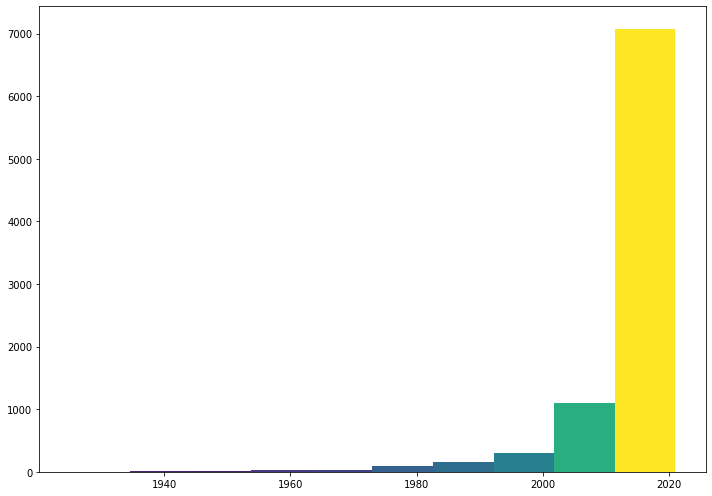

In [53]:
# Lets check the data is for how many years
relevant_df = df['release_year'].copy()
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
N, bins, patches = axs.hist(relevant_df)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

Clearly 2020 saw the bom for shows in Netflix

In [10]:
# Let's check what are the type shows added
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

So we have two type of shows in the data set

# Plotting a bargraph with type of Shows

In [22]:
# Determing dataset for the program
relevant_df = df['type'].copy()
relevant_df = pd.DataFrame(relevant_df)

In [31]:
plotting_df = relevant_df.groupby('type').agg({'type' : 'count'}).rename({'type':'num_of_shows'})
plotting_df

,type
type,
Movie,6126
TV Show,2664


[Text(0, 0, 'Movie'), Text(0, 0, 'TV Show')]

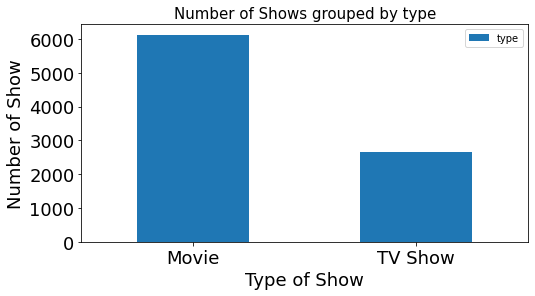

In [37]:
plotting = plotting_df.plot.bar(figsize = (8,4),fontsize = 18)
plotting.set_title('Number of Shows grouped by type', fontsize = 15)
plotting.set_xlabel('Type of Show', fontsize = 18)
plotting.set_ylabel('Number of Show', fontsize = 18)
plotting.set_xticklabels(['Movie','TV Show'],rotation=0) 